# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [3]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [4]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
type(mapbox_token)

str

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
sfo_data_housing = sfo_data.drop( columns = ["neighborhood","sale_price_sqr_foot","gross_rent"])
sfo_data_housing
mean_housing_per_year = sfo_data_housing.groupby('year').mean()
mean_housing_per_year.head(10)
#type(mean_housing_per_year)

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
plot_year_housing_units = mean_housing_per_year.hvplot.bar(title="Housing Units in San Francisco from 2010-2016", ylim=(370000,385000), bar_width=0.5, yformatter="%.0f")#.opts(bokeh)
plot_year_housing_units

#plt.show()
#plt.close(fig_housing_units)

:Bars   [year]   (housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [8]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!
sfo_data_grossrent_sales = sfo_data.drop( columns = ["neighborhood","housing_units"])
sfo_data_grossrent_sales_df = sfo_data_grossrent_sales.groupby('year').mean()
sfo_data_grossrent_sales_df

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


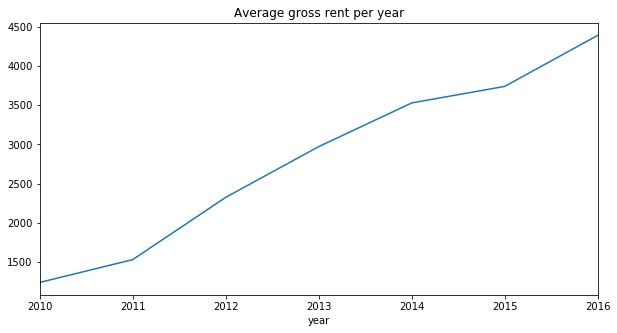

In [9]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
#fig = plt.figure()
#ax= plt.subplot()
#ax.plot(x=sfo_data_grossrent_sales_df.index, y=sfo_data_grossrent_sales_df["gross_rent"])
#ax.sfo_data_grossrent_sales_df["gross_rent"].plot(title = "Average gross rent per year",figsize=(10,5))
#type(av_rent_year_plot)
#y=sfo_data_grossrent_sales_df["gross_rent"].plot(title = "Average gross rent per year",figsize=(10,5))
sfo_data_grossrent_sales_plot=sfo_data_grossrent_sales_df["gross_rent"].plot(title = "Average gross rent per year",figsize=(10,5)).get_figure()
sfo_data_grossrent_sales_plot.savefig("Resources/ave_gross_rent.png")
#sfo_data_grossrent_sales_plot=sfo_data_grossrent_sales_df["gross_rent"].plot(title = "Average gross rent per year",figsize=(10,5)).get_figure()
#ax.y
#fig.savefig("Resources/test.png")

### Average Sales Price per Year

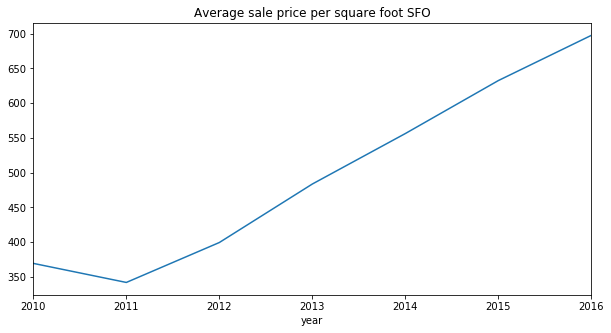

In [10]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
sfo_data_sales_plot = sfo_data_grossrent_sales_df["sale_price_sqr_foot"].plot(title = "Average sale price per square foot SFO",figsize=(10,5)).get_figure()
sfo_data_sales_plot.savefig("Resources/avg_sale.png")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [11]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
new_data=sfo_data.reset_index()
new_data.head()


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [12]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
hv_plot_chart = new_data.hvplot.line(y='sale_price_sqr_foot', x='year', groupby='neighborhood')
hv_plot_chart

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [13]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
data_by_neighborhood = sfo_data.groupby('neighborhood').mean()
sort_most_expensive_df =data_by_neighborhood.sort_values("sale_price_sqr_foot",ascending=False)
sort_most_expensive_df
top10_most_expensive_df = sort_most_expensive_df.iloc[:10,:]
top10_most_expensive_df.reset_index(inplace = True)
top10_most_expensive_df
#type(top10_most_expensive_df['sale_price_sqr_foot'])
#px.parallel_coordinates(top10_most_expensive_df, color = "sale_price_sqr_foot")


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [14]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top_10_most_exp_plot = top10_most_expensive_df.hvplot.bar(
    x="neighborhood",
    y="sale_price_sqr_foot",
    title="Top 10 most expensive neighborhoods in San Francisco",
    rot=90,
    frame_height=200,
    frame_width=600,
    cmap="Accent",
    line_color="darkblue",
    line_width=2,
    selection_color="Orange",
    ylim=(600,950),
)
top_10_most_exp_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [15]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
df_for_parallel_coord = sfo_data
df_for_parallel_coord_grp=df_for_parallel_coord.groupby('neighborhood').count()
df_for_parallel_coord_grp.head()
px.parallel_coordinates(top10_most_expensive_df, color = "sale_price_sqr_foot")

In [16]:
# Parallel Categories Plot
# YOUR CODE HERE!
px.parallel_categories(

top10_most_expensive_df,
color ="sale_price_sqr_foot",
color_continuous_scale=px.colors.sequential.Inferno
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [17]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [18]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
mean_values_per_neighborhoods=sfo_data.groupby('neighborhood').mean()
mean_values_per_neighborhoods.reset_index(inplace=True)
mean_values_per_neighborhoods.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [19]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
join_neighborhood_values_w_coordinates = pd.concat([df_neighborhood_locations,mean_values_per_neighborhoods],axis="columns", join="inner")
join_neighborhood_values_w_coordinates.head()

,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [20]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
px.set_mapbox_access_token(mapbox_token)
map_neighborhoods_rent = px.scatter_mapbox(
    join_neighborhood_values_w_coordinates,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color ="gross_rent",
    color_continuous_scale = px.colors.cyclical.IceFire,
    zoom=11,
    title ="Average sale price per square foot and Gross-rent in San Francisco Area"
)



In [21]:
map_neighborhoods_rent.show()

In [20]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
neighborhood_map=px.scatter_mapbox(
    join_neighborhood_values_w_coordinates,
    lat="Lat",
    lon="Lon",
    size="gross_rent"
)

neighborhood_map.show()

